# Market regimes

This notebook illustrates several **GBM market scenarios** and their parameterization.

## Singular GBM regimes

**What to notice.** Paths are normalized and shown on a log scale. The **mean** follows
$$
\mathbb{E}[S(t)] = S_0\,e^{\mu t},
$$
while the **median (typical) path** follows
$$
\mathrm{median}\,S(t) = S_0\,e^{(\mu-\dfrac{1}{2}\sigma^2)t},
$$
so the median lies **below** the mean (see [GBM derivation](../theory/01_gbm.ipynb)).  
The **10–90% band** shows the middle 80% of paths **at each date** and widens as \(\sigma\) increases (greater dispersion).

In [104]:
import pandas as pd
from mlbt.simulator.regimes import visualize_gbm_regime, GBM_REGIMES

TDY = 260

df = pd.DataFrame(GBM_REGIMES)
df["g = mu - 0.5*sigma^2"] = df["mu"] - 0.5 * df["sigma"]**2
df["TDY"] = TDY

fmt = {
    "mu": "{:.2%}".format,
    "sigma": "{:.2%}".format,
    "g = mu - 0.5*sigma^2": "{:.2%}".format,
    "TDY": "{}".format,
}
df_disp = df[["label", "mu", "sigma", "g = mu - 0.5*sigma^2", "TDY"]].rename(
    columns={"label": "Label", "mu": "μ", "sigma": "σ"}
).style.format(fmt)

md = df[["label","mu","sigma","g = mu - 0.5*sigma^2","TDY"]].rename(
    columns={"label":"Label","mu":"μ","sigma":"σ"}
).to_string()

print("Regime categories")
print(md)

Regime categories
                 Label     μ     σ  g = mu - 0.5*sigma^2  TDY
0       Bull - Low Vol  0.08  0.10               0.07500  260
1      Bull - High Vol  0.08  0.30               0.03500  260
2   Sideways - Low Vol  0.00  0.10              -0.00500  260
3  Sideways - High Vol  0.00  0.30              -0.04500  260
4       Bear - Low Vol -0.05  0.10              -0.05500  260
5      Bear - High Vol -0.05  0.30              -0.09500  260
6         Crisis Shock -0.20  0.45              -0.30125  260


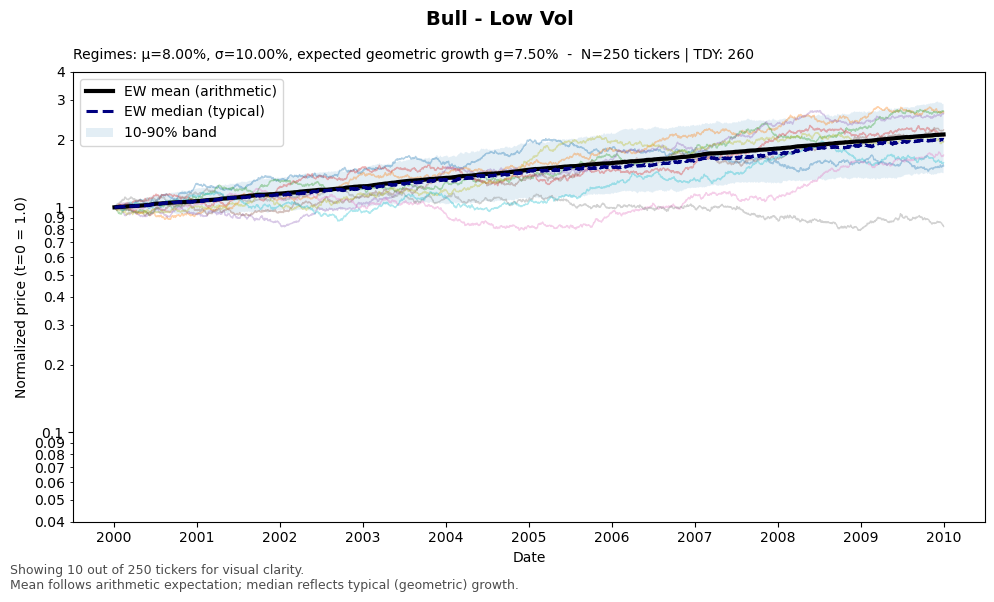

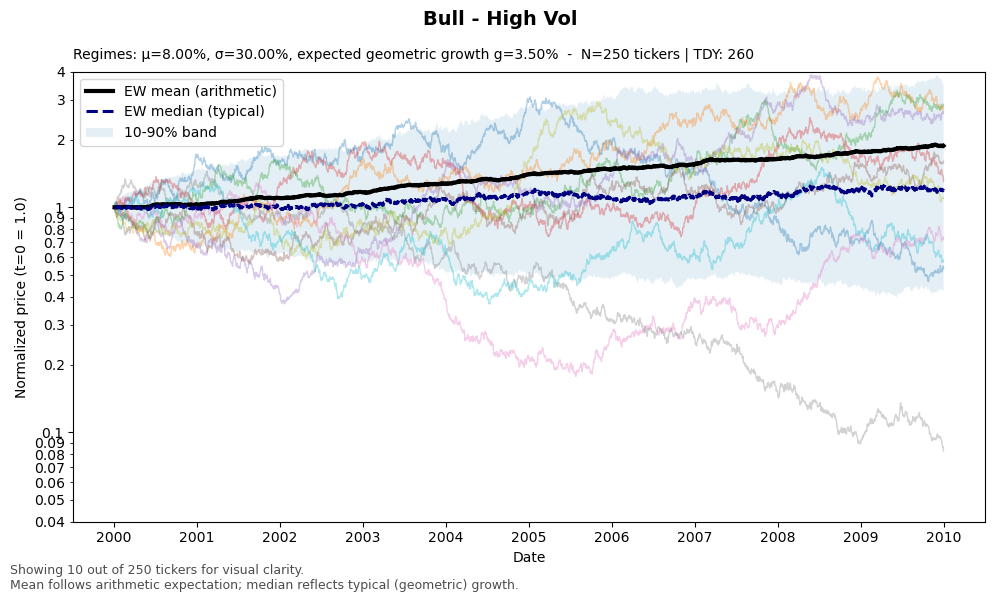

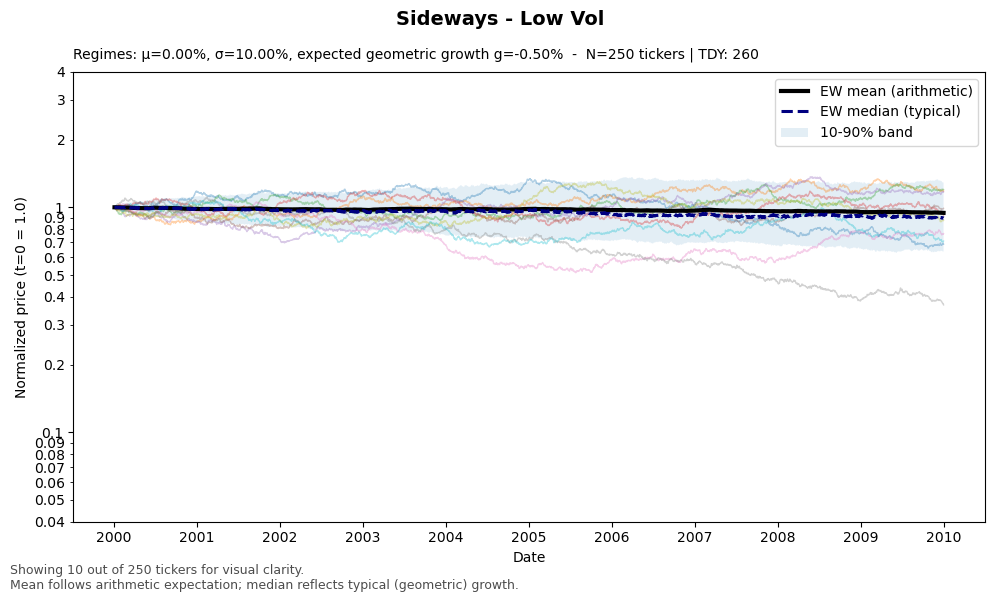

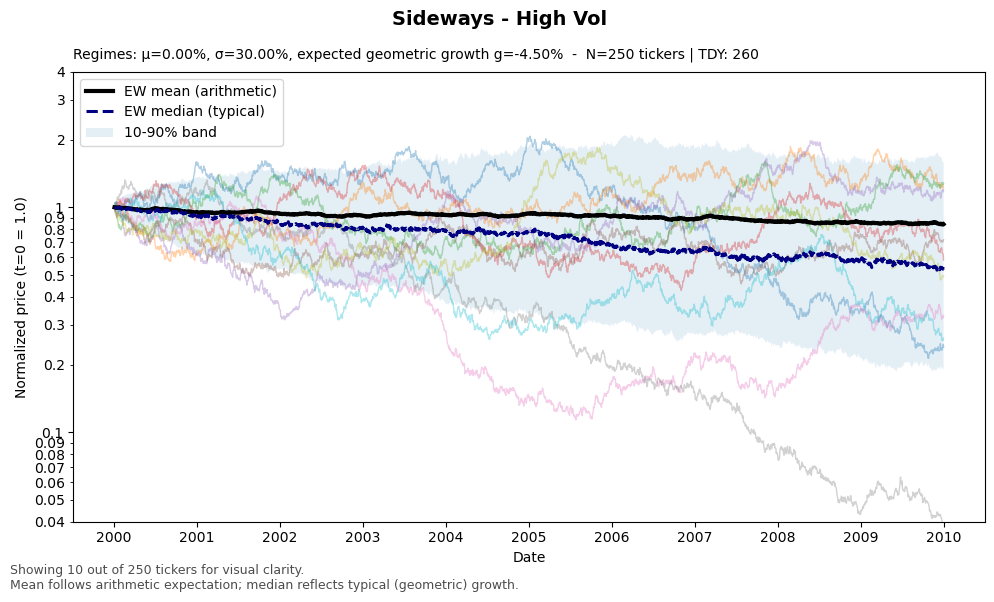

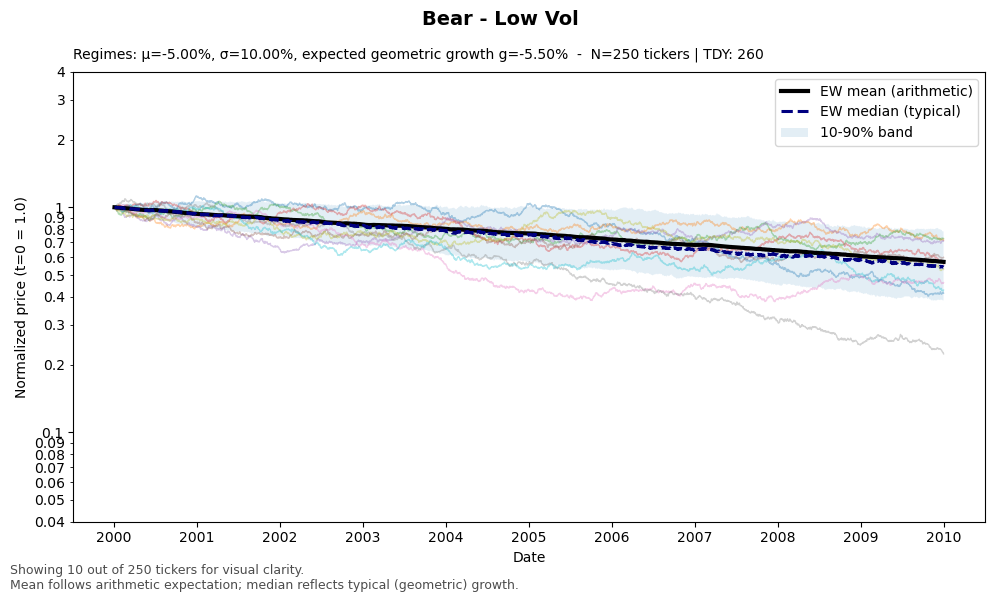

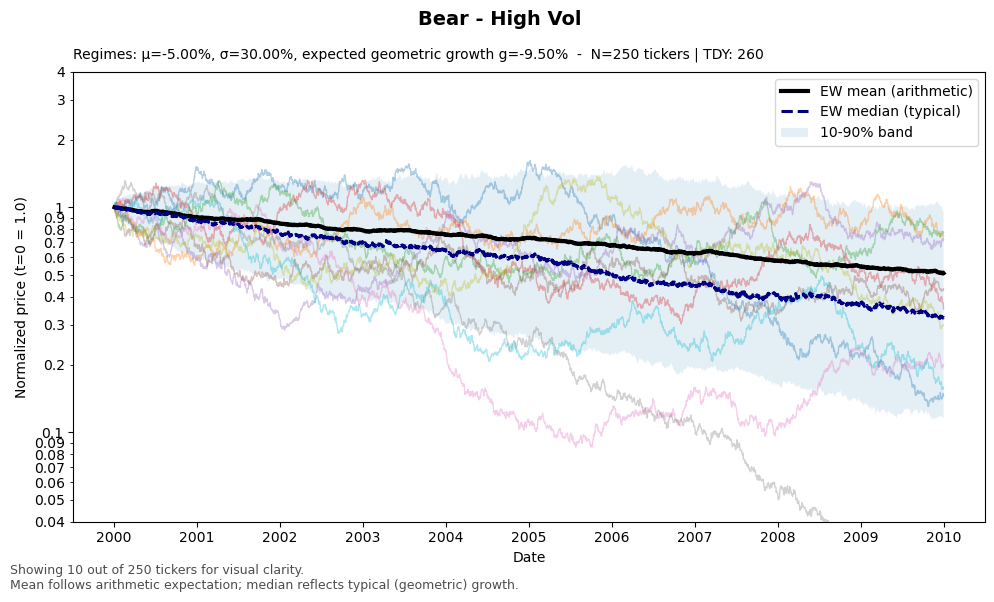

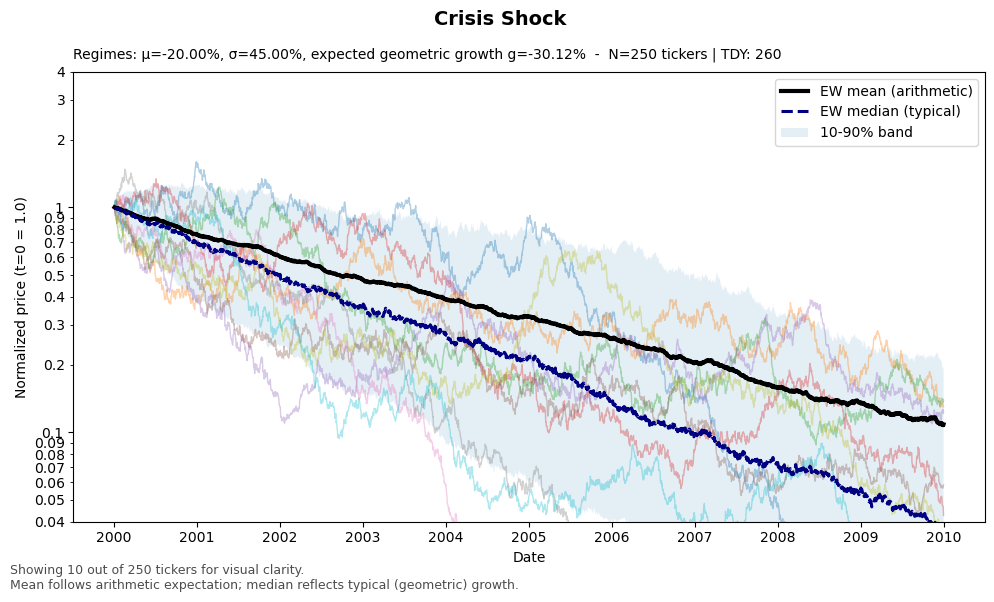

In [105]:
cfg = {
    "calendar": pd.bdate_range("2000-01-01", "2009-12-31", freq="B"),
    "n_tickers": 250,
    "tdy": TDY,
    "seed": 1990
}
for reg in GBM_REGIMES:
    visualize_gbm_regime(
        **cfg,
        regimes=[reg],
        label=reg["label"],
        y_lim=(0.04, 4),
        # savepath=f"../../docs/images/gbm_regimes/{reg['label'].replace("- ", "").replace(" ", "_")}.png"
    )